In [3]:
dir

<function dir>

In [4]:
pwd

'/Users/pichappan/Documents/SamplePython/notebook'

In [5]:
cd ../input

/Users/pichappan/Documents/SamplePython/input


In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [9]:
df0 = pd.read_csv("auto_risk.csv")
df0.tail()

,Age,Gender,Accident,bRisk,mRisk
94,42,F,5,High,H
95,34,F,5,High,H
96,77,M,4,High,H
97,68,F,7,High,H
98,32,M,6,High,H


In [35]:
df1=pd.get_dummies(df0, columns=['Gender','bRisk'], drop_first=True)
df1.head()

,Age,Accident,mRisk,Gender_M,bRisk_Low
0,48,1,L,0,1
1,47,0,L,1,1
2,46,1,L,0,1
3,44,1,L,1,1
4,43,0,L,0,1


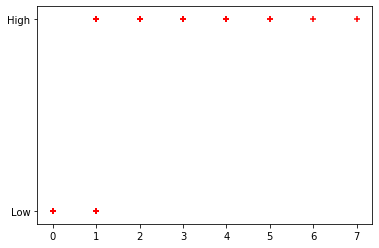

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df0.Accident, df0.bRisk, marker='+', color='red')

In [15]:
df0.shape

(99, 5)

In [36]:
X_all = df1.drop(['mRisk','bRisk_Low'],axis='columns')
y_all = df1.bRisk_Low
y_all

0     1
1     1
2     1
3     1
4     1
     ..
94    0
95    0
96    0
97    0
98    0
Name: bRisk_Low, Length: 99, dtype: uint8

In [38]:
from sklearn.model_selection import train_test_split
X_learn, X_actual, y_learn, y_actual = train_test_split(X_all, y_all, test_size=0.20, random_state=1)

In [50]:
X_actual

,Age,Accident,Gender_M
92,36,4,0
83,82,1,1
32,26,0,1
80,78,1,1
78,23,2,1
17,33,0,0
35,24,1,0
81,21,2,1
88,25,3,1
91,59,3,1


In [40]:
from sklearn.linear_model import LogisticRegression
lrModel = LogisticRegression()
lrModel.fit(X_learn, y_learn)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
lrModel.predict([[36,4,0]])

array([0], dtype=uint8)

In [42]:
lrModel.predict(X_actual)

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=uint8)

In [43]:
lrModel.score(X_actual, y_actual)

0.85

In [45]:
lrModel.predict_proba(X_actual)

array([[0.9812831 , 0.0187169 ],
       [0.90042473, 0.09957527],
       [0.07192562, 0.92807438],
       [0.8764829 , 0.1235171 ],
       [0.49798725, 0.50201275],
       [0.15645345, 0.84354655],
       [0.2963644 , 0.7036356 ],
       [0.46773026, 0.53226974],
       [0.81438769, 0.18561231],
       [0.97178567, 0.02821433],
       [0.20595194, 0.79404806],
       [0.23292653, 0.76707347],
       [0.85490835, 0.14509165],
       [0.86275108, 0.13724892],
       [0.71115616, 0.28884384],
       [0.10821712, 0.89178288],
       [0.76778714, 0.23221286],
       [0.56528305, 0.43471695],
       [0.91337015, 0.08662985],
       [0.49594565, 0.50405435]])

In [5]:
df0 = pd.read_csv("Airbnb_NYC.csv")
df0.tail()

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
38728,Staten Island,40.64641,-74.08502,EntireHome,2.0,1.0,106,58,4.73,130.0
38729,Staten Island,40.64682,-74.08734,PrivateRoom,20.0,1.0,89,58,1.05,43.0
38730,Staten Island,40.64730,-74.08408,PrivateRoom,30.0,4.0,0,85,1.35,105.0
38731,Staten Island,40.64762,-74.08682,EntireHome,3.0,1.0,232,5,1.88,135.0
38732,Staten Island,40.64779,-74.08460,EntireHome,1.0,1.0,250,108,2.32,140.0


In [6]:
# Data Pre-Processing - Cleansing, Editing, Reduction, Munging, Wrangling

df1 = df0.dropna(thresh=9)
 
df1.Min_Nights.fillna(df1.Min_Nights.median())
df1.Host_Listing_Cnt.fillna(df1.Host_Listing_Cnt.median())
df1.Days_Available.fillna(df1.Days_Available.median())
df1.Review_Cnt.fillna(df1.Review_Cnt.median())
df1.Reviews30d.fillna(df1.Reviews30d.median())
df1.Price.fillna(df1.Price.median())
 
df1.Prop_Type.value_counts()

EntireHome     20173
PrivateRoom    17720
SharedRoom       840
Name: Prop_Type, dtype: int64

In [7]:
# Create 2 new Columns with map method, it's quick & easy

df1['isEntireHome'] = df1.Prop_Type.map({'EntireHome':1,'PrivateRoom':0,'SharedRoom':0})
df1['isPrivateRoom'] = df1.Prop_Type.map({'EntireHome':0,'PrivateRoom':1,'SharedRoom':0})
df1[3:5] # show rows with ids from 3 to 4 but not 5

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price,isEntireHome,isPrivateRoom
3,Bronx,40.80091,-73.91449,PrivateRoom,21.0,2.0,117,18,0.36,71.0,0,1
4,Bronx,40.80143,-73.91353,EntireHome,2.0,3.0,0,12,3.50,115.0,1,0


In [8]:
# One-Hot-Encoding and the Dummy Variable - easy & flexible
dummyBoro = pd.get_dummies(df1.Boroughs, prefix='is').iloc[:,:4] # [all rows, 4 column from start] dropped last column
dummyProp = pd.get_dummies(df1.Prop_Type, prefix='is').iloc[:,1:] # [all rows, column 1 through end] dropped first column

In [9]:
df2 = pd.concat([df1,dummyBoro, dummyProp], axis='columns') # concat 3 df
df2 = pd.concat([df1,dummyBoro], axis='columns') # or axis=1
df2.head()

,Boroughs,Latitude,Longitude,Prop_Type,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price,isEntireHome,isPrivateRoom,is_Bronx,is_Brooklyn,is_Manhattan,is_Queens
0,Bronx,40.80011,-73.91330,PrivateRoom,21.0,2.0,291,19,0.27,60.0,0,1,1,0,0,0
1,Bronx,40.80024,-73.91422,PrivateRoom,3.0,1.0,0,59,2.93,49.0,0,1,1,0,0,0
2,Bronx,40.80074,-73.91574,PrivateRoom,3.0,1.0,354,3,0.87,50.0,0,1,1,0,0,0
3,Bronx,40.80091,-73.91449,PrivateRoom,21.0,2.0,117,18,0.36,71.0,0,1,1,0,0,0
4,Bronx,40.80143,-73.91353,EntireHome,2.0,3.0,0,12,3.50,115.0,1,0,1,0,0,0


In [10]:
# Dummy variable trap, Multicollinearity (1 variable can be predicted from another)
df3 = df2.drop(['Boroughs','Prop_Type'], axis='columns')
df3.dropna(inplace=True) # Drop rows with NaN
df3.shape

(38331, 14)

In [11]:
# is all this too hard? don't worry we have a quick and easy way. Pass df instead of Series to get_dummies method
df2=pd.get_dummies(df1, columns=['Boroughs','Prop_Type'], drop_first=True)
df2

,Latitude,Longitude,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price,isEntireHome,isPrivateRoom,Boroughs_Brooklyn,Boroughs_Manhattan,Boroughs_Queens,Boroughs_Staten Island,Prop_Type_PrivateRoom,Prop_Type_SharedRoom
0,40.80011,-73.91330,21.0,2.0,291,19,0.27,60.0,0,1,0,0,0,0,1,0
1,40.80024,-73.91422,3.0,1.0,0,59,2.93,49.0,0,1,0,0,0,0,1,0
2,40.80074,-73.91574,3.0,1.0,354,3,0.87,50.0,0,1,0,0,0,0,1,0
3,40.80091,-73.91449,21.0,2.0,117,18,0.36,71.0,0,1,0,0,0,0,1,0
4,40.80143,-73.91353,2.0,3.0,0,12,3.50,115.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38728,40.64641,-74.08502,2.0,1.0,106,58,4.73,130.0,1,0,0,0,0,1,0,0
38729,40.64682,-74.08734,20.0,1.0,89,58,1.05,43.0,0,1,0,0,0,1,1,0
38730,40.64730,-74.08408,30.0,4.0,0,85,1.35,105.0,0,1,0,0,0,1,1,0
38731,40.64762,-74.08682,3.0,1.0,232,5,1.88,135.0,1,0,0,0,0,1,0,0


In [12]:
# LinearRegression Class Object
lrModel = linear_model.LinearRegression()
X_all = df3.drop('Price',axis='columns')
y_all = df3.Price

In [13]:
X_all.head()

,Latitude,Longitude,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,isEntireHome,isPrivateRoom,is_Bronx,is_Brooklyn,is_Manhattan,is_Queens
0,40.80011,-73.91330,21.0,2.0,291,19,0.27,0,1,1,0,0,0
1,40.80024,-73.91422,3.0,1.0,0,59,2.93,0,1,1,0,0,0
2,40.80074,-73.91574,3.0,1.0,354,3,0.87,0,1,1,0,0,0
3,40.80091,-73.91449,21.0,2.0,117,18,0.36,0,1,1,0,0,0
4,40.80143,-73.91353,2.0,3.0,0,12,3.50,1,0,1,0,0,0


In [14]:
y_all.head()

0     60.0
1     49.0
2     50.0
3     71.0
4    115.0
Name: Price, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_learn, X_actual, y_learn, y_actual = train_test_split(X_all, y_all, test_size=0.40, random_state=1)

In [16]:
X_learn

,Latitude,Longitude,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,isEntireHome,isPrivateRoom,is_Bronx,is_Brooklyn,is_Manhattan,is_Queens
9264,40.68749,-73.95494,3.0,3.0,249,116,1.21,0,1,0,1,0,0
16015,40.71777,-73.95824,1.0,2.0,24,19,1.34,0,1,0,1,0,0
3277,40.65823,-73.93459,1.0,1.0,314,1,1.00,0,1,0,1,0,0
11315,40.69380,-73.97404,3.0,2.0,76,2,1.15,1,0,0,1,0,0
25833,40.76284,-73.99226,30.0,20.0,335,7,0.35,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7824,40.68374,-73.96452,3.0,1.0,344,99,1.96,1,0,0,1,0,0
32857,40.83469,-73.93961,4.0,1.0,0,3,0.05,1,0,0,0,1,0
5197,40.67358,-73.94351,1.0,1.0,0,7,0.14,1,0,0,1,0,0
12190,40.69758,-73.99139,2.0,1.0,0,2,0.05,1,0,0,1,0,0


In [17]:
X_learn.shape

(22998, 13)

In [18]:
X_actual.shape

(15333, 13)

In [19]:
# Learning or Training the Model
lrModel.fit(X_learn, y_learn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lrModel.intercept_

-28540.049728906502

In [21]:
lrModel.coef_

array([-1.28442321e+02, -4.55378474e+02, -4.71930807e-01, -7.67931110e-01,
        1.67240444e-01, -1.90765118e-01, -4.90967050e-01,  1.27756778e+02,
        2.96218844e+01,  1.42507079e+02,  1.26458957e+02,  1.72052520e+02,
        1.51178559e+02])

In [22]:
print('Y-Intercept: '+ str(lrModel.intercept_) + '\n\nX-Cofficient: ' + str(lrModel.coef_))

Y-Intercept: -28540.049728906502

X-Cofficient: [-1.28442321e+02 -4.55378474e+02 -4.71930807e-01 -7.67931110e-01
  1.67240444e-01 -1.90765118e-01 -4.90967050e-01  1.27756778e+02
  2.96218844e+01  1.42507079e+02  1.26458957e+02  1.72052520e+02
  1.51178559e+02]


In [23]:
# How to predict just one target or y-variable
lrModel.predict([[40.80024, -73.91422, 13.0, 1.0, 0, 29, 2.93, 1, 0, 0, 0, 1,0]])

array([164.35303533])

In [24]:
# How good is the Model
lrModel.score(X_actual, y_actual)

0.11415409127093855

In [25]:
y_predict  = lrModel.predict(X_actual)
y_predict

array([123.75112643, 216.66904496, 229.99632815, ..., 216.49569843,
       102.64058878,  19.03743127])

In [26]:
y_actual

25789    280.0
18602    140.0
26033    275.0
21016     99.0
4047     120.0
         ...  
26193    160.0
14330    175.0
17328    750.0
29717     95.0
34898     75.0
Name: Price, Length: 15333, dtype: float64

In [27]:
# Feature Variable - Independent - X variable
# Target Variable  - Dependent   - Y variable
from sklearn.metrics import mean_squared_error, r2_score

print ('Mean Square Error between Actual and Predicted Y values........ : %8.8f' % mean_squared_error(y_actual, y_predict))
print ('Coefficient of Determination between Actual & Predicted R2 Score: %8.8f' % r2_score(y_actual, y_predict))
print ('Linear Regression Model Score with Actual X & Y valuse ........ : %8.8f' % lrModel.score(X_actual, y_actual))

Mean Square Error between Actual and Predicted Y values........ : 34841.37110423
Coefficient of Determination between Actual & Predicted R2 Score: 0.11415409
Linear Regression Model Score with Actual X & Y valuse ........ : 0.11415409
